## Hub
Hub provides same interface for several backends. Let see how it works.

## Create Ultralytics Hub

<img src="https://raw.githubusercontent.com/ultralytics/assets/main/yolov8/banner-yolov8.png" />

In [ ]:
from waffle_hub.hub.adapter.ultralytics import UltralyticsHub
from waffle_hub import TaskType

See what tasks, models are available in UltralyticsHub.

In [2]:
UltralyticsHub.MODEL_TYPES

{'object_detection': {'yolov8': ['n', 's', 'm', 'l', 'x']},
 'classification': {'yolov8': ['n', 's', 'm', 'l', 'x']},
 'instance_segmentation': {'yolov8': ['n', 's', 'm', 'l', 'x']}}

By calling `UltralyticsHub.new()` method you can simply create an Ultralytics instance.

In [3]:
ultralytics_hub = UltralyticsHub.new(
    name="ultralytics_mnist_detection",
    task=TaskType.OBJECT_DETECTION,
    model_type="yolov8",
    model_size="n",
    categories=["1", "2"]
)

`Hub` instance provides several useful properties and methods. See [Hub Documentation](https://research.snuailab.ai/waffle/waffle_hub/hub/hub/) for more details.

In [4]:
ultralytics_hub.categories

[{'supercategory': 'object', 'name': '1'},
 {'supercategory': 'object', 'name': '2'}]

## Create Huggingface Hub 
As you did in Ultralytics Hub, you can create Huggingface Hub instance with exactly same way.

<img src="https://huggingface.co/datasets/huggingface/brand-assets/resolve/main/hf-logo-with-title.png" />

In [5]:
from waffle_hub.hub.adapter.hugging_face import HuggingFaceHub
from waffle_hub import TaskType

/home/lhj/anaconda3/envs/waffle/lib/python3.9/site-packages/waffle_hub/__init__.py:56: UserWarning: 
                transformers 4.28.1 has not been tested.
                We recommend you to use one of ['4.27.4']
                
  warnings.warn(


In [6]:
HuggingFaceHub.MODEL_TYPES

{'object_detection': {'DETA': {'base': 'jozhang97/deta-resnet-50'},
  'DETR': {'base': 'facebook/detr-resnet-50',
   'large': 'facebook/detr-resnet-101'},
  'YOLOS': {'tiny': 'hustvl/yolos-tiny'}},
 'classification': {'ViT': {'tiny': 'WinKawaks/vit-tiny-patch16-224',
   'base': 'google/vit-base-patch16-224'}}}

In [7]:
huggingface_hub = HuggingFaceHub.new(
    name="huggingface_mnist_detection",
    task=TaskType.OBJECT_DETECTION,
    model_type="DETR",
    model_size="base",
    categories=["1", "2"]
)

## Create Tx Model Hub
Tx Model is a private deep learning framework of SNUAILAB. You can use it by asking our team! <br/>
You can also create Tx Model Hub instance with exactly same way.

<img src="https://github.com/snuailab/assets/blob/main/snuailab/full/snuAiLab.color.300ppi.png?raw=true" />

In [8]:
from waffle_hub.hub.adapter.tx_model import TxModelHub
from waffle_hub import TaskType

In [9]:
TxModelHub.MODEL_TYPES

{'object_detection': {'YOLOv5': ['s', 'm', 'l']},
 'classification': {'Classifier': ['s', 'm', 'l']}}

In [10]:
tx_model_hub = TxModelHub.new(
    name="tx_model_mnist_detection",
    task=TaskType.OBJECT_DETECTION,
    model_type="YOLOv5",
    model_size="s",
    categories=["1", "2"]
)

## Train

### Load Dataset

In [11]:
from waffle_hub.dataset import Dataset
from waffle_hub import DataType

dataset = Dataset.load("mnist_det")

### Ultralytics

In [ ]:
dataset_dir = dataset.export(DataType.YOLO)
train_result = ultralytics_hub.train(
    dataset_dir,
    image_size=320,
    epochs=50,
    batch_size=16
)
train_result

### Huggingface

In [13]:
import torch
torch.use_deterministic_algorithms(False)

In [ ]:
dataset_dir = dataset.export(DataType.HUGGINGFACE)
train_result = huggingface_hub.train(
    dataset_dir,
    image_size=320,
    epochs=50,
    batch_size=16
)
train_result

### Tx Model

In [ ]:
dataset_dir = dataset.export(DataType.TX_MODEL)
train_result = tx_model_hub.train(
    dataset_dir,
    image_size=320,
    epochs=50,
    batch_size=16,
    pretrained_model="base_models/detectors/small/model.pth"
)
train_result

## Evaluate

In [16]:
ultralytics_hub = UltralyticsHub.load("ultralytics_mnist_detection")
ultralytics_hub.evaluate("mnist_det", set_name="test")

100%|██████████| 3/3 [00:00<00:00, 25.25it/s]


EvaluateResult(metrics=[{'tag': 'mAP', 'value': 0.8066571950912476}])

In [17]:
huggingface_hub = HuggingFaceHub.load("huggingface_mnist_detection")
huggingface_hub.evaluate("mnist_det", set_name="test")

100%|██████████| 3/3 [00:00<00:00, 21.73it/s]


EvaluateResult(metrics=[{'tag': 'mAP', 'value': 0.18526874482631683}])

In [25]:
tx_model_hub = TxModelHub.load("tx_model_mnist_detection")
tx_model_hub.evaluate("mnist_det", set_name="test")

100%|██████████| 3/3 [00:00<00:00, 25.43it/s]


EvaluateResult(metrics=[{'tag': 'mAP', 'value': 0.1792079210281372}])

## Inference

In [18]:
import PIL.Image

100%|██████████| 25/25 [00:00<00:00, 54.73it/s]


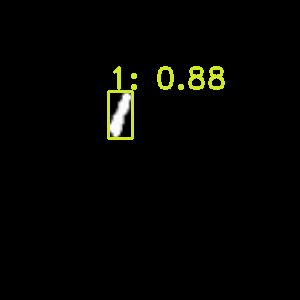

In [19]:
ultralytics_hub = UltralyticsHub.load("ultralytics_mnist_detection")
ultralytics_hub.inference("mnist/images", draw=True)
PIL.Image.open(ultralytics_hub.draw_dir / "1.png")

100%|██████████| 25/25 [00:00<00:00, 42.81it/s]


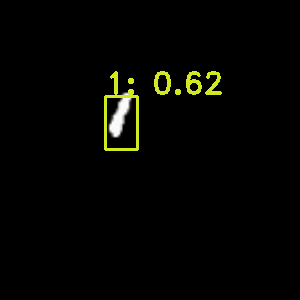

In [20]:
huggingface_hub = HuggingFaceHub.load("huggingface_mnist_detection")
huggingface_hub.inference("mnist/images", draw=True)
PIL.Image.open(huggingface_hub.draw_dir / "1.png")

100%|██████████| 25/25 [00:00<00:00, 62.38it/s]


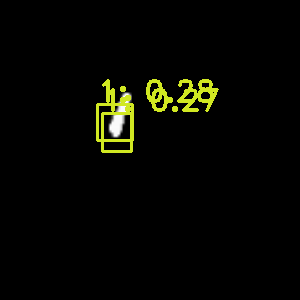

In [21]:
tx_model_hub = TxModelHub.load("tx_model_mnist_detection")
tx_model_hub.inference("mnist/images", draw=True)
PIL.Image.open(tx_model_hub.draw_dir / "1.png")

## Export to onnx

In [22]:
ultralytics_hub.export()

/home/lhj/anaconda3/envs/waffle/lib/python3.9/site-packages/ultralytics/nn/modules.py:474: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  elif self.dynamic or self.shape != shape:
/home/lhj/anaconda3/envs/waffle/lib/python3.9/site-packages/ultralytics/yolo/utils/tal.py:241: TracerWarning: Iterating over a tensor might cause the trace to be incorrect. Passing a tensor of different shape won't change the number of iterations executed (and might lead to errors or silently give incorrect results).
  for i, stride in enumerate(strides):
/home/lhj/anaconda3/envs/waffle/lib/python3.9/site-packages/torch/onnx/utils.py:617: UserWarning: ONNX Preprocess - Removing mutation from node aten::sub_ on block input: 'tensor.1'. This changes graph semantics. (Triggered internally at ../t

ExportResult(export_file=PosixPath('hubs/ultralytics_mnist_detection/weights/model.onnx'))

In [23]:
huggingface_hub.export()

/home/lhj/anaconda3/envs/waffle/lib/python3.9/site-packages/transformers/models/detr/modeling_detr.py:575: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if attn_weights.size() != (batch_size * self.num_heads, target_len, source_len):
/home/lhj/anaconda3/envs/waffle/lib/python3.9/site-packages/transformers/models/detr/modeling_detr.py:582: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if attention_mask.size() != (batch_size, 1, target_len, source_len):
/home/lhj/anaconda3/envs/waffle/lib/python3.9/site-packages/transformers/models/detr/modeling_detr.py:

ExportResult(export_file=PosixPath('hubs/huggingface_mnist_detection/weights/model.onnx'))

In [26]:
tx_model_hub.export(device="cpu")

/home/lhj/anaconda3/envs/waffle/lib/python3.9/site-packages/torch/onnx/utils.py:617: UserWarning: ONNX Preprocess - Removing mutation from node aten::sub_ on block input: 'tensor.1'. This changes graph semantics. (Triggered internally at ../torch/csrc/jit/passes/onnx/remove_inplace_ops_for_onnx.cpp:335.)
  _C._jit_pass_onnx_remove_inplace_ops_for_onnx(graph, module)


ExportResult(export_file=PosixPath('hubs/tx_model_mnist_detection/weights/model.onnx'))

## Benchmark

In [27]:
ultralytics_hub.benchmark(image_size=320, batch_size=16)

100%|██████████| 100/100 [00:01<00:00, 97.22it/s]


{'inference_time': 1.0294418334960938,
 'fps': 1554.2403154204742,
 'image_size': [320, 320],
 'batch_size': 16,
 'precision': 'fp32',
 'device': 'cuda:0',
 'cpu_name': '13th Gen Intel(R) Core(TM) i9-13900KF',
 'gpu_name': 'NVIDIA GeForce RTX 4090'}

In [28]:
huggingface_hub.benchmark(image_size=320, batch_size=16)

100%|██████████| 100/100 [00:02<00:00, 42.96it/s]


{'inference_time': 2.328606128692627,
 'fps': 687.1063252325563,
 'image_size': [320, 320],
 'batch_size': 16,
 'precision': 'fp32',
 'device': 'cuda:0',
 'cpu_name': '13th Gen Intel(R) Core(TM) i9-13900KF',
 'gpu_name': 'NVIDIA GeForce RTX 4090'}

In [29]:
tx_model_hub.benchmark(image_size=320, batch_size=16)

100%|██████████| 100/100 [00:00<00:00, 113.23it/s]


{'inference_time': 0.8841898441314697,
 'fps': 1809.5661362992278,
 'image_size': [320, 320],
 'batch_size': 16,
 'precision': 'fp32',
 'device': 'cuda:0',
 'cpu_name': '13th Gen Intel(R) Core(TM) i9-13900KF',
 'gpu_name': 'NVIDIA GeForce RTX 4090'}